In [286]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [287]:
X = 2*np.random.rand(100000,1)
y = 4+3*X+np.random.rand(100000,1)

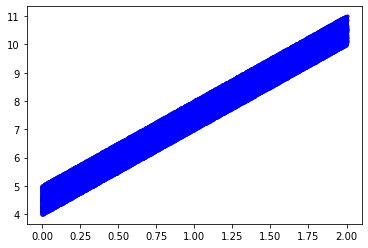

In [288]:
plt.plot(X,y,'b.')
plt.show()

# Normal Equation

In [289]:
# find theta using normal equtions
X_b = np.c_[np.ones((len(X), 1)), X]
# normal equ=> theta = (Xtranspose.X)inv.Xtranspose.y
# X0 = 1, so adding 1 to all elements of X
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [290]:
theta_best

array([[4.49787065],
       [3.00215797]])

In [291]:
# now for a new X predict y
X_new = np.array([[-1],[0], [1], [2]])

In [292]:
X_new_b = np.c_[np.ones((len(X_new), 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [293]:
y_predict

array([[ 1.49571269],
       [ 4.49787065],
       [ 7.50002862],
       [10.50218659]])

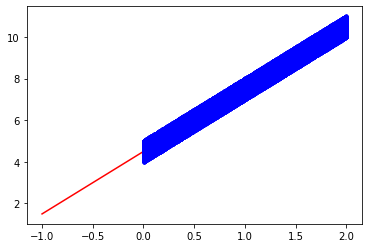

In [294]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
# plt.axis([0,2,0,15])
plt.show()

# sklearn linear regression

In [295]:
# now try sklearn linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
# almost same as normal equtions

(array([4.49787065]), array([[3.00215797]]))

In [296]:
# predict
y_lin_predict = lin_reg.predict(X_new)

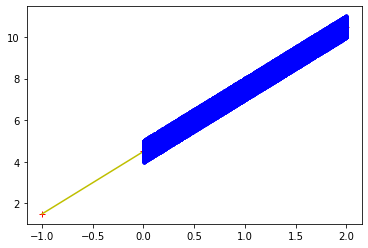

In [297]:
# plot
plt.plot(X_new,y_predict,'r+')
plt.plot(X_new,y_lin_predict,'y-')
plt.plot(X,y,'b.')
plt.show()

# Code - Batch Gradient Descent

[[4.49787048]
 [3.00215811]]


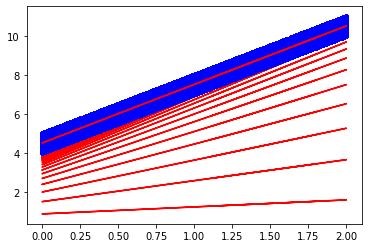

In [298]:
# i will be using 1/2 of cost function so 2 will get cancle and in partial derivatives we will have 1/m not 2/m
# we already have X
# X bar
m = len(X)
X_b = np.c_[np.ones((m, 1)), X]
eta = 0.1
iterations = 1000
cost_hist = np.zeros(iterations)
theta = np.random.rand(2,1)
for itr in range(iterations):
    y_hat = X_b.dot(theta)
    cost = (sum((y_hat - y) **2))/(2*m)
    # save the cost for the plot
    cost_hist[itr] = cost
#     print('----------------')
#     print('iterations = %s' %itr)
#     print('theta = %s' %theta)
#     print('cost = %s' %cost)
#     print('----------------')
    gradients = 1/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
    plt.plot(X,y,'b.')
    plt.plot(X,y_hat,'r-')
    
print(theta)

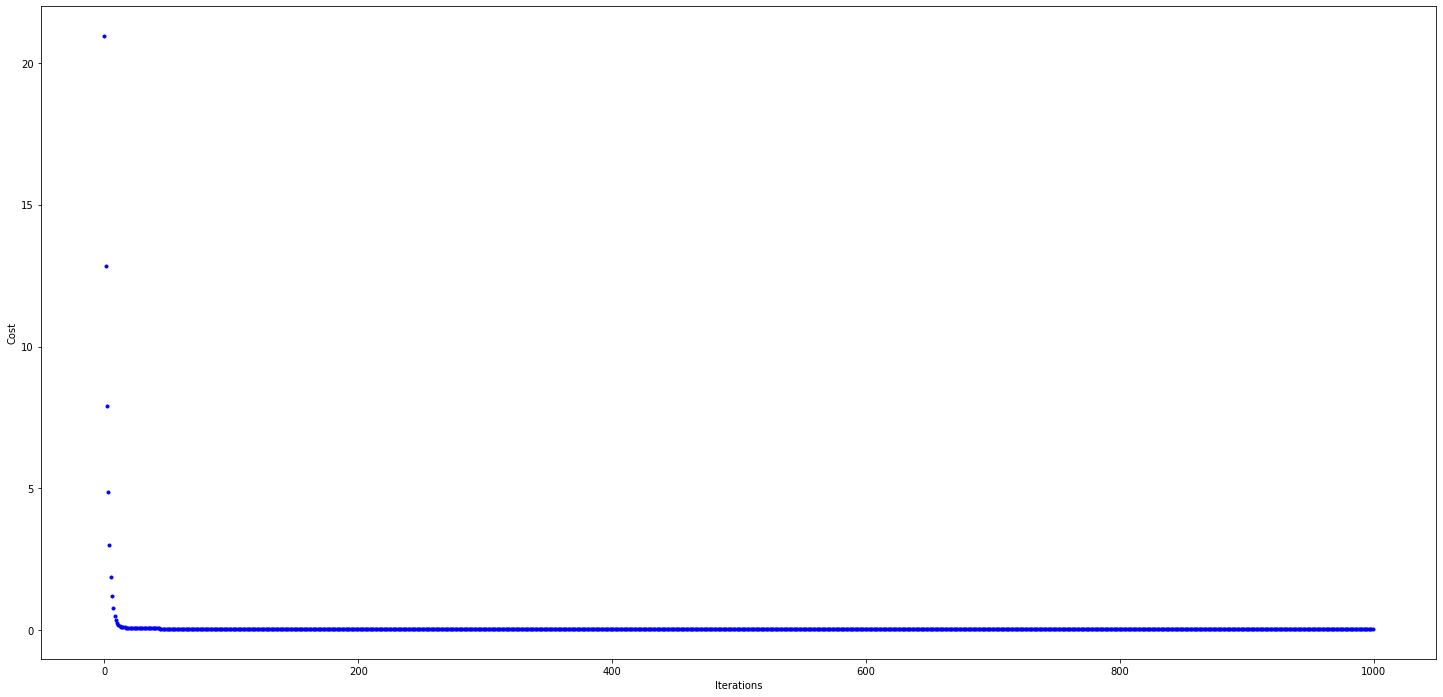

In [299]:
fig,ax = plt.subplots(figsize=(25,12))
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations), cost_hist, 'b.')
plt.show()

# Code - Stochastic Gradient Descent

# sklearn Stochastic Gradient Descent

In [300]:
# X = 2*np.random.rand(10000000,3)
# y = 4+3 * X[:,0].reshape(10000000,1)+np.random.rand(10000000,1)

In [301]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.49486824] [3.00813098]
